# CE - 652
## Artificial Intelligence for Autonomous Driving
## Application Assigments 
##### Week: 5, 6
##### Instructor: Dr. Juan D. Gomez
Related Videos: [The CNN](www.youtube.com) 

In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

### Excercise:

David Hunter Hubel and Torsten Wiesel earned a Nobel Prize in 1981 for his experimental work with the cortex of an anesthetized cat. 

By and large, they discovered that each neuron in the primary visual cortex concentrates on exclusively processing a small, specific portion or patch of the visual field (and nothing else). It is as if the neuron is linked to that single visual patch. So, it only responds to visual stimuli presented exclusively there. But, additionally, it does not respond to any stimulus there, but only to specific ones. This is, the neuron only fires when it detects one (1) particular pattern in one (1) particular area of the visual field. [See this video for more information](https://www.youtube.com/watch?v=RSNofraG8ZE)

Recently, it was shown that Convolutional Neural Networks CNN use the same neural space-shape specialization principle. Actually, this is one of the reason why CNN are so popular in computer vision and specifically, in autonomous driving: they learn to perform visual tasks in the same fashion as biological brains doe.  The proof for this was achieved by visualizing the output of inner layers in CNN. Commonly, the only output of a CNN that is available and interesting, for us, is the final response of the output layer. But, visualizing inner outputs show that neurons in inner layers are only responsive to specific patches of the input and when such contain specific patterns.  [Have a look at the original paper for nice visualizations and better understand this point](https://cs.nyu.edu/~fergus/papers/zeilerECCV2014.pdf)

##### In this exercise we will try to show that CNN and biological brains work similarly as described by Hubel and Wiesel:

First we will ‘simulate’ a cat’s brain using a CNN model. Actually, this will be a very poor simulation because our CNN will only be trained to tell cats from dogs (i.e. only one single skill of a cat will be simulated). You will find both, training and testing data attached to this Jupyter notebook. Please train and test according to the code below. 
Once we have our cat’s brain CNN-based model, we will built a second CNN model (with only one layer) to gain access to the outputs of the cortex (first layer) of the cat’s brain. Therefore, we will transfer the trained weights of the full model’s first layer to the single-layer model. The final outputs of the single-layer model will be equal to the internal first layer’s outputs of our cat’s brain model. 

Finally, we will find the neurons (in the cortex or first layer) that get excited more times (excitable neurons) when the cortex is presented with the testing images. Also, we will find the exact patches that excite those excitable neurons. And, lastly, we will find the patterns in such patches that excite the most excitable neurons. A visualization of this exercise must show information about the 3 or 4 most excitable neurons: the patch in the visual image (field) that can potentially get them excited; and some of the patterns (in that patch) that finally get them excited. 


### 1. Data:

The folder 'train' contains 25k natural images of cats and dogs (take a look!). Inside 'train' there is also a folder called 'training_data', where all the images have been discriminated and grouped in 2 subfolders 'cats' and 'dogs'. If you check 'cats' and 'dogs' you will also notice that the images have been preprocessed for training purposes (i.e. all of them have the same size of 50x50 and are gray scale). 

As for the folder 'test', it contains natural testing images of cats and dogs, as well as a folder 'val_data' where all these images have been preprocessed (not discriminated). This preprocessed images will serve the purpose of evaluating the model once it is trained. 


### 2. Train a CNN model:



Initialize a CNN network in Keras as a sequential model:


In [2]:
cat_brain = keras.models.Sequential()

Let's give our model a structure by adding several layers (1 convolution, 1 pooling, 1 convolution, 1 flatter, a full connected). And, remember that this model will be trained to represent or mimic a cat's brain (a very basic one that can only tell cats from dogs):

In [3]:
# Convolution
cat_brain.add(keras.layers.Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))

# Pooling
cat_brain.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Second convolutional layer
cat_brain.add(keras.layers.Conv2D(32, (3, 3), activation = 'relu'))
cat_brain.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Flattening
cat_brain.add(keras.layers.Flatten())

# Full connection
cat_brain.add(keras.layers.Dense(units = 128, activation = 'relu'))
cat_brain.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))

Let's see a summary of our brain model:

In [14]:
cat_brain.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               495744    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

Let's create the training data set and the training labels (0=cat, 1=dog):

In [6]:
train_images=np.zeros((25000, 50, 50, 3))
train_labels=np.zeros((25000, 1))

In [7]:
TRAIN_DIR = 'D:/all/train/training_data/cats' 
for indx, name in enumerate(os.listdir(TRAIN_DIR )):
        path = os.path.join(TRAIN_DIR,name)
        img = cv2.imread(path)/ 255.0
        train_images[indx,:,:,:]=img
        train_labels[indx]=0

TRAIN_DIR = 'D:/all/train/training_data/dogs' 
for indx, name in enumerate(os.listdir(TRAIN_DIR )):
        path = os.path.join(TRAIN_DIR,name)
        img = cv2.imread(path)/ 255.0
        train_images[12500+indx,:,:,:]=img
        train_labels[12500+indx]=1

Now, compile the model:

In [31]:
cat_brain.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Now we are ready to train (fit) our model: 

In [15]:
# NOTE: if you train the model with 25 epochs of 8000 steps (as the command below suggests), it will spend a lot of time (perhaps a day) training. 
# Therefore, if wished reduce those numbers (for instance to 10 and 782). You will get a less accurrated model though. 


#cat_brain.fit(train_images, train_labels, epochs=10)
cat_brain.fit(train_images, train_labels,  steps_per_epoch = 8000,
                         epochs = 25)

Epoch 1/10
782/782 [==============================] - 37s 47ms/step - loss: 0.6085 - accuracy: 0.6588
Epoch 2/10
782/782 [==============================] - 35s 44ms/step - loss: 0.5016 - accuracy: 0.7552
Epoch 3/10
782/782 [==============================] - 34s 44ms/step - loss: 0.4508 - accuracy: 0.7878
Epoch 4/10
782/782 [==============================] - 35s 45ms/step - loss: 0.4001 - accuracy: 0.8182
Epoch 5/10
782/782 [==============================] - 35s 45ms/step - loss: 0.3460 - accuracy: 0.8480
Epoch 6/10
782/782 [==============================] - 35s 45ms/step - loss: 0.2754 - accuracy: 0.8826
Epoch 7/10
782/782 [==============================] - 34s 44ms/step - loss: 0.1999 - accuracy: 0.9199
Epoch 8/10
782/782 [==============================] - 35s 44ms/step - loss: 0.1392 - accuracy: 0.9476
Epoch 9/10
782/782 [==============================] - 35s 45ms/step - loss: 0.0891 - accuracy: 0.9681
Epoch 10/10
782/782 [==============================] - 35s 44ms/step - loss: 0.059

Finally, let's save our cat's brain (the model and trained weights) in disk for future usage: 

In [17]:
model_json = cat_brain.to_json()
with open("D:/all/model.json","w") as json_file:
  json_file.write(model_json)

cat_brain.save_weights("D:/all/model.h5")
print("saved model..! ready to go.")

saved model..! ready to go.


### 3. Testing our model:

First, let's load our saved model and weights from disk:

In [18]:
json_file = open('D:/all/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cat_brain = keras.models.model_from_json(loaded_model_json)

cat_brain.load_weights("D:/all/model.h5")
print("Loaded model from disk")

Loaded model from disk


Let's compile it:

In [19]:
cat_brain.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Let's test our cat's brain with one single image (a cat):

In [20]:
img = cv2.imread("D:/all/train/cat.1.jpg")
img = cv2.resize(img, (50,50))
print(img.shape)
img = img.reshape(1, 50, 50, 3)

(50, 50, 3)


In [21]:
print(cat_brain.predict(img))

[[0.]]


Good! the cat's brain recognized the pic as a cat. 

Now, let's create a function that allows us to test the network model (cat's brain) with more images: 

In [22]:
def try_network(dir):
    counter=1
    num_rows = 5
    num_cols = 5
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*num_cols, 2*num_rows))
    for i in os.listdir(dir):
        if np.random.random_sample()>0.01:
            path = os.path.join(dir,i)
            img = cv2.imread(path)
            plt.subplot(num_rows,num_cols, counter)
            plt.grid(False)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(img, cmap=plt.cm.binary)
            img = cv2.resize(img, (50,50))
            img = img.reshape(1, 50, 50, 3)
            if cat_brain.predict(img) == 0:
                label = 'C A T'
            else:
                label = 'D O G'  
            plt.xlabel(label)
            counter+=1
            if counter>num_images:
                break


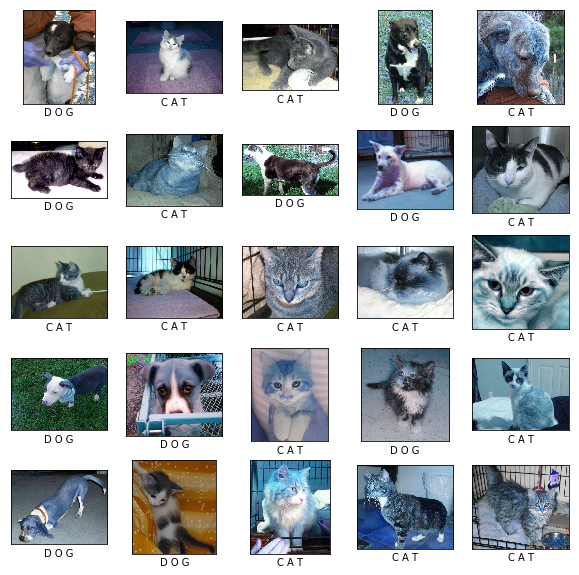

In [23]:
try_network('D:/all/test')

How good was the recognition test? If not so good, do not worry! another model layout or more training will improve it. The aim of this assigment is not to train a super accurrated network. 

### 4. The Hubel and Wiesel Cat Experiment:

Let's load our saved model (although we already loaded it, but suppose this was a separated file):

In [24]:
json_file = open('D:/all/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cat_brain = keras.models.model_from_json(loaded_model_json)

cat_brain.load_weights("D:/all/model.h5")
print("Loaded model from disk")

Loaded model from disk


Now, let's create our testing model for this experiment. This model will represent the cortex of our cat's brain (i.e the fisrt layer of our trained model). So, notice that the model will be added only one single layer: 

In [25]:
# Initialising the CNN
cortex = keras.models.Sequential()
# Convolution
cortex.add(keras.layers.Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))

We added only one layer because we want to evaluate the output of that layer (cortex), instead of the whole network or brain. Thus, we can see which neurons (in this first layer) are more excitable and what patterns get them excited. 

Next, we are going to transfer the weights of the first layer of our loaded model (brain's cortex of our cat) to this new single-layer model, so evaluating the single-layer model is equivalent to internally evaluating the cortex of the cat. We need to create a single-layer model and read its responses, because in the original model those internal values are not accessible (only the outputs of the final layer are):



In [26]:
# Here your code (one line)

This code counts how many times each neuron (in the cortex) gets excited with the images in dir 'D:/all/test':

In [27]:
# here your code

# Try all the test images (8495) in 'D:/all/test', one by one, with the 'cortex' model (e.g. cortex.predict(img)) 
# and find out, for each image, which neuron of the model was activated or responded 
# with the highest value (the most excited or exitable neuron). 
# For each neuron, keep  counting how many times it was the most excited or exitable. 
# So that when you finish testing all the test images, you can rank the neurons 
# by the number of times they got to be the most excited.

 
# Remember that the output of the 'cortex' model for one single image is of size (1,48,48,32). 

This code finds the 4 most excited neurons in the cortex and create, for each, a blank visual field image with a dot (3x3) in its position: 

In [28]:
# here your code

# Find the four neurons (in the ranking) that managed to be the most excited neuron, most times during the test.


# Build four 50x50 blank images, one for each field of view of the four most excited neurons during the test. 
# For each image, place a 3x3 black patch right at the position 
# where its associated neuron lies within the layer of the model 'cortex'.

This code finds the patches that excited the most excited neurons:

In [29]:
# Your code here

# For each of the four neurons, collect six 3x3 patches, 
# from any six test images that have caused the neuron to be the most excited.

Let's plot the results:

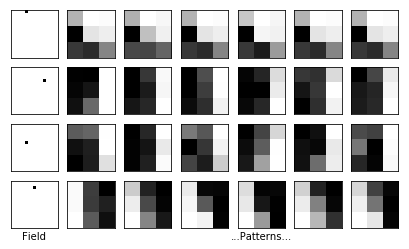

In [30]:
# Here your code:

# plot all the calculations above, so your output image will resemble the one below:
                

In the figure above, rows represent info about the (4) most excitable neurons in the cortex. First column is the visual field (a blank 50x50 pixel image) with a black dot (actually a 3x3 pixel dot) placed over the patch associated to the respective neuron (which is actually the position of the neuron in the layer). The rest of the columns are examples of the same patch (zoomed in) at the moment when it got the neuron firing (i.e. when the activation pattern that excites the neuron showed up in the patch). Notice how the 6 patterns in each row are consistent (almost equal), this is, the neuron responds only to a specific stimulus in its associated patch, as Hubel and Wiesel discovered in real cats. 